In [25]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename = 'nwm.csv'
df = pd.read_csv(filename)
df = df.drop(df.columns[0], axis=1)

In [26]:
df

,C1,C2,C3,C4
0,0.60,0.93,0.00,0.73
1,0.66,0.55,0.45,0.49
2,1.00,0.45,0.57,0.50
3,0.48,0.87,0.00,0.75
4,0.62,0.40,0.56,0.50
5,0.78,0.27,0.71,0.50
6,0.40,0.90,0.00,0.82
7,0.64,0.44,0.54,0.54
8,0.65,0.30,0.71,0.55
9,0.45,0.86,0.00,0.73


Pary wariantów do oceny:
- 3 i 17 - para 15
- 11 i 14 - para 16
- 0 i 11 - para 9
- 13 i 25 - para 28 
- 7 i 8 - para 36

Nasza preferencja zakłda wybór wariantów gdzie oba kryteria, c3 i c4, są niższe. W efekcie:

- 3 jest preferowane nad 17
- 11 jest preferowane nad 14
- 0 jest nierozróżnialne z 11
- 13 jest preferowane nad 25
- 7 jest preferowane nad 8



In [27]:
# Import the library
from pulp import *

# Create a problem variable:
prob = LpProblem("MaximizeEpsilon", LpMaximize)

# Create problem variables:
# epsilon
e = LpVariable("e", lowBound=0)

# mins
u1_32 = LpVariable("u1_32", lowBound=0) # u1_32>=0
u2_3 = LpVariable("u2_03", lowBound=0) # u2_03>=0
u3_0 = LpVariable("u3_0", lowBound=0) # u3_0>=0
u4_49 = LpVariable("u4_49", lowBound=0) # u4_49>=0

# maxs
u1_100 = LpVariable("u1_100", lowBound=0) # u1_100>=0
u2_100 = LpVariable("u2_100", lowBound=0) # u2_100>=0
u3_100 = LpVariable("u3_100", lowBound=0) # u3_100>=0
u4_100 = LpVariable("u4_100", lowBound=0) # u4_100>=0

# variant 3
u1_48 = LpVariable("u1_48", lowBound=0) # u1_48>=0
u2_87 = LpVariable("u2_87", lowBound=0) # u2_87>=0
# u3_0 = LpVariable("u3_0", lowBound=0) # u3_0>=0
u4_75 = LpVariable("u4_75", lowBound=0) # u4_75>=0

# variant 17
u1_76 = LpVariable("u1_76", lowBound=0) # u1_76>=0
u2_6 = LpVariable("u2_6", lowBound=0) # u2_6>=0
# u3_100 = LpVariable("u3_100", lowBound=0) # u3_100>=0
u4_60 = LpVariable("u4_60", lowBound=0) # u4_60>=0

# variant 11
u1_74 = LpVariable("u1_74", lowBound=0) # u1_74>=0
u2_25 = LpVariable("u2_25", lowBound=0) # u2_25>=0
u3_80 = LpVariable("u3_80", lowBound=0) # u3_80>=0
# u4_49 = LpVariable("u4_49", lowBound=0) # u4_49>=0

# variant 14
u1_87 = LpVariable("u1_87", lowBound=0) # u1_87>=0
# u2_03 = LpVariable("u2_03", lowBound=0) # u2_03>=0
# u3_100 = LpVariable("u3_100", lowBound=0) # u3_100>=0
u4_61 = LpVariable("u4_61", lowBound=0) # u4_61>=0

# variant 0
u1_60 = LpVariable("u1_60", lowBound=0) # u1_60>=0
u2_93 = LpVariable("u2_93", lowBound=0) # u2_93>=0
# u3_0 = LpVariable("u3_0", lowBound=0) # u3_0>=0
u4_73 = LpVariable("u4_73", lowBound=0) # u4_73>=0

# variant 13
#u1_69 = LpVariable("u1_69", lowBound=0) # u1_69>=0
#u2_49 = LpVariable("u2_49", lowBound=0) # u2_49>=0
#u3_56 = LpVariable("u3_56", lowBound=0) # u3_56>=0
# u4_61 = LpVariable("u4_61", lowBound=0) # u4_61>=0

# variant 25
#u1_71 = LpVariable("u1_71", lowBound=0) # u1_71>=0
# u2_25 = LpVariable("u2_25", lowBound=0) # u2_25>=0
#u3_88 = LpVariable("u3_88", lowBound=0) # u3_88>=0
#u4_67 = LpVariable("u4_67", lowBound=0) # u4_67>=0

# variant 7
u1_64 = LpVariable("u1_64", lowBound=0) # u1_64>=0
u2_44 = LpVariable("u2_44", lowBound=0) # u2_44>=0
u3_54 = LpVariable("u3_54", lowBound=0) # u3_54>=0
u4_54 = LpVariable("u4_54", lowBound=0) # u4_54>=0

# variant 8
u1_65 = LpVariable("u1_65", lowBound=0) # u1_65>=0
u2_30 = LpVariable("u2_30", lowBound=0) # u2_30>=0
u3_71 = LpVariable("u3_71", lowBound=0) # u3_71>=0
u4_55 = LpVariable("u4_55", lowBound=0) # u4_55>=0

# variant 9
u1_45 = LpVariable("u1_45", lowBound=0) # u1_45>=0
u2_86 = LpVariable("u2_86", lowBound=0) # u2_86>=0
u3_0 = LpVariable("u3_0", lowBound=0) # u3_0>=0
u4_73 = LpVariable("u4_73", lowBound=0) # u4_73>=0

u1 = [u1_32, u1_45, u1_48, u1_60, u1_64, u1_65, u1_74, u1_76, u1_87, u1_100]
u2 = [u2_3, u2_6, u2_25, u2_30, u2_44, u2_86, u2_87, u2_93, u2_100]
u3 = [u3_0, u3_54, u3_71, u3_80, u3_100]
u4 = [u4_49, u4_54, u4_55, u4_60, u4_61, u4_73, u4_75, u4_100]

us = [u1, u2, u3, u4]

In [28]:
prob += e, "Objective Function"

# Add constraints:

# preferations
prob += u1_48 + u2_87 + u3_0 + u4_75 >= u1_76 + u2_6 + u3_100 + u4_60 + e, "3 incomparable with 17"
prob += u1_74 + u2_25 + u3_80 + u4_49 >= u1_87 + u2_3 + u3_100 + u4_61 + e, "11 prefered over 14"
prob += u1_60 + u2_93 + u3_0 + u4_73 == u1_74 + u2_25 + u3_80 + u4_49 , "0 incomparable with 11"
#prob += u1_69 + u2_49 + u3_56 + u4_61 >= u1_71 + u2_25 + u3_88 + u4_67 + e, "13 prefered over 25"
prob += u1_64 + u2_44 + u3_54 + u4_54 >= u1_65 + u2_30 + u3_71 + u4_55 + e, "7 prefered over 8"
prob += u1_45 + u2_86 + u3_0 + u4_73 >= u1_60 + u2_93 + u3_0 + u4_73 + e, "9 prefered over 0"

# normalizations
prob += u1_32 + u2_3 + u3_0 + u4_49 == 1, "normalization"
prob += u1_100 == 0, "u1_min"
prob += u2_100 == 0, "u2_min"
prob += u3_100 == 0, "u3_min"
prob += u4_100 == 0, "u4_min"

# non-negativity - already set in LpVariable
# for u in us:
#     for a in u:
#         prob += a >= 0

# monotonicity
for u in us:
    for a, b in zip(u, u[1:]):
        prob += a >= b

# manipulating weights
prob += u3_0 >= u2_3 * 4
prob += u3_0 >= u1_32 * 2
prob += u4_49 >= u1_32 + u2_3
prob += u1_32 >= 0.10
prob += u2_3 >= 0.02


In [29]:
prob

MaximizeEpsilon:
MAXIMIZE
1*e + 0
SUBJECT TO
3_incomparable_with_17: - e + u1_48 - u1_76 - u2_6 + u2_87 + u3_0 - u3_100
 - u4_60 + u4_75 >= 0

11_prefered_over_14: - e + u1_74 - u1_87 - u2_03 + u2_25 - u3_100 + u3_80
 + u4_49 - u4_61 >= 0

0_incomparable_with_11: u1_60 - u1_74 - u2_25 + u2_93 + u3_0 - u3_80 - u4_49
 + u4_73 = 0

7_prefered_over_8: - e + u1_64 - u1_65 - u2_30 + u2_44 + u3_54 - u3_71 + u4_54
 - u4_55 >= 0

9_prefered_over_0: - e + u1_45 - u1_60 + u2_86 - u2_93 + 0 u3_0 + 0 u4_73 >= 0

normalization: u1_32 + u2_03 + u3_0 + u4_49 = 1

u1_min: u1_100 = 0

u2_min: u2_100 = 0

u3_min: u3_100 = 0

u4_min: u4_100 = 0

_C1: u1_32 - u1_45 >= 0

_C2: u1_45 - u1_48 >= 0

_C3: u1_48 - u1_60 >= 0

_C4: u1_60 - u1_64 >= 0

_C5: u1_64 - u1_65 >= 0

_C6: u1_65 - u1_74 >= 0

_C7: u1_74 - u1_76 >= 0

_C8: u1_76 - u1_87 >= 0

_C9: - u1_100 + u1_87 >= 0

_C10: u2_03 - u2_6 >= 0

_C11: - u2_25 + u2_6 >= 0

_C12: u2_25 - u2_30 >= 0

_C13: u2_30 - u2_44 >= 0

_C14: u2_44 - u2_86 >= 0

_C15: u2

In [30]:
# Solve the problem
prob.solve()
print("Status:", LpStatus[prob.status])

# Print the optimal production amount of x and y
for v in prob.variables():
    print(v.name, "=", v.varValue)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /var/data/python/lib/python3.11/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/f7bc671c46124bc4aadc0916ccf4e301-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/f7bc671c46124bc4aadc0916ccf4e301-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 48 COLUMNS
At line 165 RHS
At line 209 BOUNDS
At line 210 ENDATA
Problem MODEL has 43 rows, 33 columns and 113 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 21 (-22) rows, 17 (-16) columns and 69 (-44) elements
Perturbing problem by 0.001% of 1 - largest nonzero change 0.00018820109 ( 0.018820109%) - largest zero change 0.00017231038
0  Obj -3.485703e-05 Primal inf 0.98999602 (4) Dual inf 0.9998108 (1)
11  Obj 0.29976703
Optimal - objective value 0.3
After Postsolve, objective 0.3, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective

In [31]:
f1_y = [u.varValue for u in u1]
f2_y = [u.varValue for u in u2]
f3_y = [u.varValue for u in u3]
f4_y = [u.varValue for u in u4]

print(f1_y)
print(f2_y)
print(f3_y)
print(f4_y)

[0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0]
[0.4, 0.4, 0.0, 0.0, 0.0]
[0.3, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [32]:
import numpy as np
def uf1(c1):
    if c1<=1:
        return 0.25
    
def uf2(c2):
    if c2<=1:
        return 0.25
    
def uf3(c3):
    if c3<=1:
        return 0.25
    
def uf4(c4):
    if c4<=1:
        return 0.25
    
def uf(c1, c2, c3, c4):
    return uf1(c1) + uf2(c2) + uf3(c3) + uf4(c4)

x = np.arange(0, 1.01, 0.01)
y1 = [uf1(c1) for c1 in x]
y2 = [uf2(c2) for c2 in x]
y3 = [uf3(c3) for c3 in x]
y4 = [uf4(c4) for c4 in x]

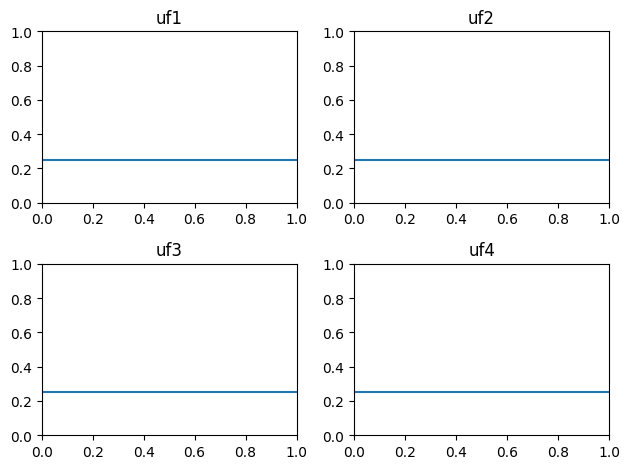

In [33]:
fig, axs = plt.subplots(2, 2)

# Plot y1
axs[0, 0].plot(x, y1)
axs[0, 0].set_title('uf1')
axs[0, 0].set_xlim(min(x), max(x))
axs[0, 0].set_ylim(0, 1)

# Plot y2
axs[0, 1].plot(x, y2)
axs[0, 1].set_title('uf2')
axs[0, 1].set_xlim(min(x), max(x))
axs[0, 1].set_ylim(0, 1)

# Plot y3
axs[1, 0].plot(x, y3)
axs[1, 0].set_title('uf3')
axs[1, 0].set_xlim(min(x), max(x))
axs[1, 0].set_ylim(0, 1)

# Plot y4
axs[1, 1].plot(x, y4)
axs[1, 1].set_title('uf4')
axs[1, 1].set_xlim(min(x), max(x))
axs[1, 1].set_ylim(0, 1)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [34]:
df['U'] = df.apply(lambda row: uf(row['C1'], row['C2'], row['C3'], row['C4']), axis=1)
df_sorted = df.sort_values('U', ascending=False)

In [35]:
df

,C1,C2,C3,C4,U
0,0.60,0.93,0.00,0.73,1.0
1,0.66,0.55,0.45,0.49,1.0
2,1.00,0.45,0.57,0.50,1.0
3,0.48,0.87,0.00,0.75,1.0
4,0.62,0.40,0.56,0.50,1.0
5,0.78,0.27,0.71,0.50,1.0
6,0.40,0.90,0.00,0.82,1.0
7,0.64,0.44,0.54,0.54,1.0
8,0.65,0.30,0.71,0.55,1.0
9,0.45,0.86,0.00,0.73,1.0
